In [86]:
import geopandas as gp
import matplotlib.pyplot as plt
from shapely import geometry
import math

In [87]:
# 环湖数据处理
lake_original_path = 'E:\\just\\海韵湖智能技术实验场\\原始数据\\data\\环湖数据.txt'
lake_original_data = ''
lake_points = []
with open(lake_original_path) as f:
    lake_original_data = f.read()
for xy in lake_original_data.split(';'):
    x, _, y = xy.partition(',')
    x = float(x.strip()) / 100
    y = float(y.strip()) / 100
    lake_points.append(geometry.Point(y, x))

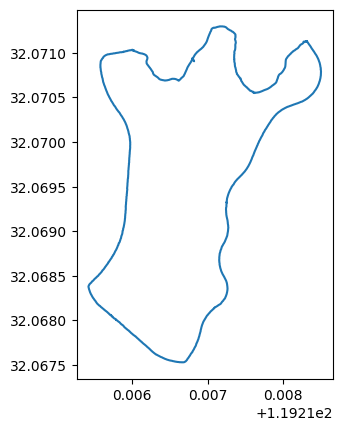

In [88]:
# 环湖要素处理
lake_isSave = True
# 创建线状要素
lake_line = geometry.LineString(lake_points)
lake_ = gp.GeoSeries(lake_line, crs='EPSG:4326')
if lake_isSave:
    lake_.to_file("E:\\just\\海韵湖智能技术实验场\\data\\boundary.shp", driver='ESRI Shapefile', encoding='utf-8')
# 记录边界条件
x_min, y_min, x_max, y_max = lake_line.bounds[:4]
# 绘图
lake_.plot()
plt.show()

In [ ]:
# 浮岛数据处理
island_original_path = 'E:\\just\\海韵湖智能技术实验场\\原始数据\\data\\浮岛数据.txt'
island_original_data = ''
island_points = []
with open(island_original_path) as f:
    island_original_data = f.read()
for xy in island_original_data.split(';'):
    x, _, y = xy.partition(',')
    x = float(x.strip()) / 100
    y = float(y.strip()) / 100
    island_points.append(geometry.Point(y, x))

In [ ]:
# 浮岛要素处理
island_isSave = True
# 创建线状要素
island_line = geometry.LineString(island_points)
island_ = gp.GeoSeries(island_line, crs='EPSG:4326')
if island_isSave:
    island_.to_file("E:\\just\\海韵湖智能技术实验场\\data\\island.shp", driver='ESRI Shapefile', encoding='utf-8')
# 绘图
island_.plot()
plt.show()

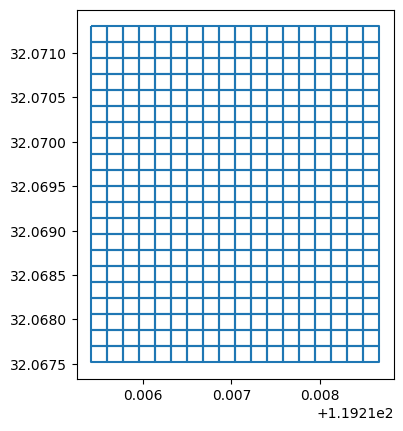

In [89]:
# 栅格处理
grid_isSave = True
GRID_WIDTH = 0.009 * 2 / 100
grid_rows_num = int(math.ceil((y_max - y_min) / float(GRID_WIDTH)))
grid_columns_num = int(math.ceil((x_max - x_min) / float(GRID_WIDTH)))
grids = []
for r in range(grid_rows_num):
    for c in range(grid_columns_num):
        grid_4coords = []
        # 左上角
        x_lt = x_min + c * GRID_WIDTH
        y_lt = y_max - r * GRID_WIDTH
        # 右上角
        x_rt = x_lt + GRID_WIDTH
        y_rt = y_lt
        # 左下角
        x_lb = x_lt
        y_lb = y_lt - GRID_WIDTH
        # 右下角
        x_rb = x_rt
        y_rb = y_lb
        # 两个三角形拼接一个栅格
        grid_4coords.append(geometry.Point(x_lt,y_lt))
        grid_4coords.append(geometry.Point(x_rt,y_rt))
        grid_4coords.append(geometry.Point(x_rb,y_rb))
        grid_4coords.append(geometry.Point(x_lb,y_lb))
        grid_4coords.append(geometry.Point(x_lt,y_lt))
        # 创建一个网格
        grids.append(geometry.LineString(grid_4coords))
grid_ = gp.GeoSeries(grids)
grid_.to_csv('E:\\just\\海韵湖智能技术实验场\\data\\grids.csv',encoding='utf-8')
if grid_isSave:
    grid_.to_file('E:\\just\\海韵湖智能技术实验场\\data\\grids.shp',driver='ESRI Shapefile', encoding='utf-8')
grid_.plot()
plt.show()

In [ ]:
# 障碍物处理

In [ ]:
# 航迹处理

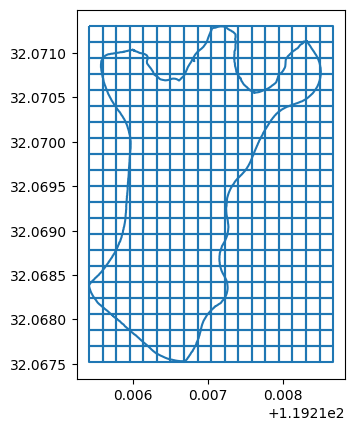

In [90]:
# 要素叠加
elements_isSave = False
elements = [lake_line]
elements += grids
elements_ = gp.GeoSeries(elements, crs='EPSG:4326')
if elements_isSave:
    elements_.to_file('E:\\just\\海韵湖智能技术实验场\\data\\elements.shp', driver='ESRI Shapefile', encoding='utf-8')
elements_.plot()
plt.show()